In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Feature Selection Based on Variance

In [37]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('fetal_health_selection.csv')



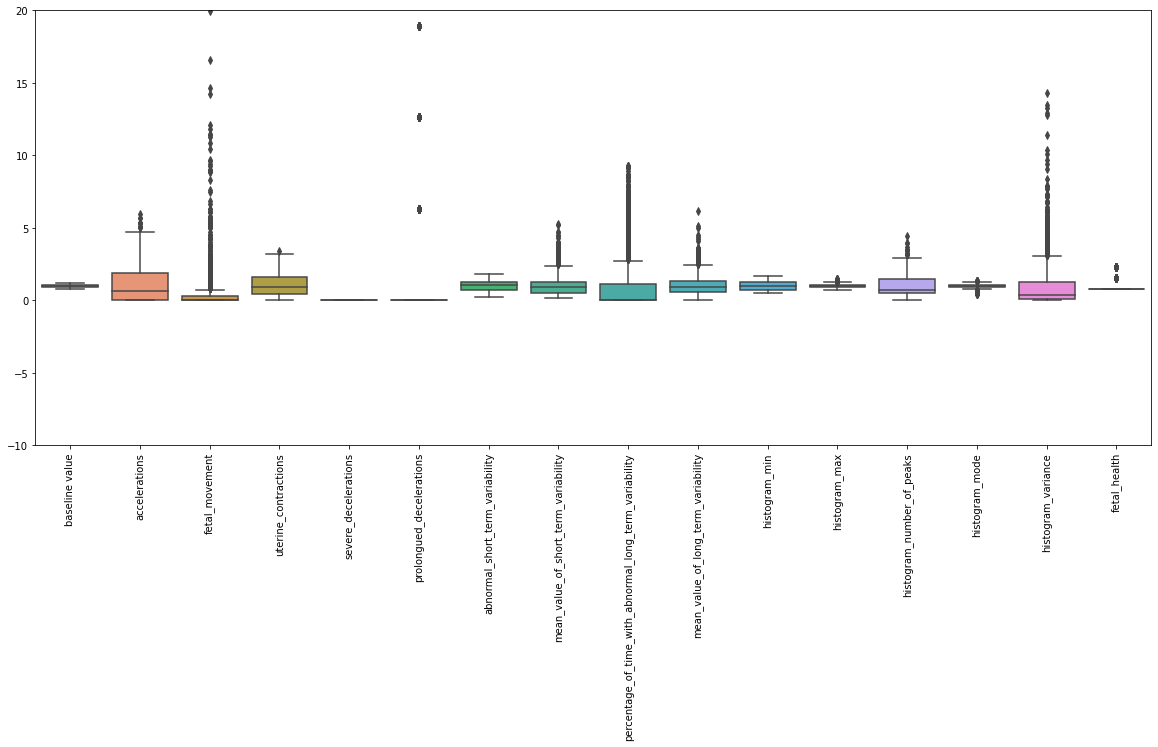

baseline value                                              0.005450
accelerations                                               1.479280
fetal_movement                                             24.227917
uterine_contractions                                        0.455235
severe_decelerations                                      302.856739
prolongued_decelerations                                   13.851394
abnormal_short_term_variability                             0.133869
mean_value_of_short_term_variability                        0.439176
percentage_of_time_with_abnormal_long_term_variability      3.490683
mean_value_of_long_term_variability                         0.472531
histogram_min                                               0.099782
histogram_max                                               0.011968
histogram_number_of_peaks                                   0.525603
histogram_mode                                              0.014203
histogram_variance                

In [38]:
normalized_data = data / data.mean()

fig = plt.figure(figsize=(20,8))

plot = sns.boxplot(data=normalized_data)
plot.tick_params(axis='x', rotation=90)
plot.set(ylim=(-10, 20))
plt.show()
print(normalized_data.var())

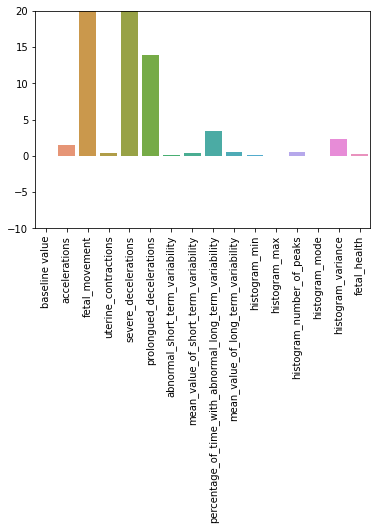

In [39]:
plot = sns.barplot(x=normalized_data.var().index, y=normalized_data.var().values)
plot.tick_params(axis='x', rotation=90)
plot.set(ylim=(-10, 20))
plt.show()


In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000
mean_value_of_long_term_variability,2126.0,8.187629,5.628247,0.0,4.600,7.400,10.800,50.700


In [41]:
print(normalized_data.var()[normalized_data.var() < 0.4])

baseline value                     0.005450
abnormal_short_term_variability    0.133869
histogram_min                      0.099782
histogram_max                      0.011968
histogram_mode                     0.014203
fetal_health                       0.221869
dtype: float64


Above features show signifanctly lower variance than the rest of the features and will be therefore dropped to reduce dimensionality in the dataset and avoid overfitting later down the line. `prolonged_decelerations` as well as `severe_decelerations` show higher variance, but on visual exploration of their distribution, this is mainly due to some outliers in the data. Therefore these will be dropped as well.

In [42]:
data_red = data.drop(columns=['baseline value', 'abnormal_short_term_variability', 'histogram_min', 'histogram_max', 'histogram_mode', 'prolongued_decelerations', 'severe_decelerations'])
X = data_red.drop(columns=['fetal_health'])
y = data_red['fetal_health']
cols = data_red.columns


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
data_scaled_df = pd.DataFrame(X_scaled)
data_scaled_df["fetal_health"] = data["fetal_health"]
data_scaled_df.columns = cols
data_scaled_df.head()

,accelerations,fetal_movement,uterine_contractions,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_number_of_peaks,histogram_variance,fetal_health
0,-0.822388,-0.20321,-1.482465,-0.943095,1.802542,-1.028560,-0.701397,1.870569,2.0
1,0.730133,-0.20321,0.554627,0.868841,-0.535361,0.393176,0.655137,-0.234998,1.0
2,-0.046128,-0.20321,1.233657,0.868841,-0.535361,0.926327,0.316003,-0.200481,1.0
3,-0.046128,-0.20321,1.233657,1.208579,-0.535361,2.632411,2.350804,-0.200481,1.0
4,0.988886,-0.20321,1.233657,1.208579,-0.535361,2.081488,1.672537,-0.269516,1.0


## Pairwise Correlation

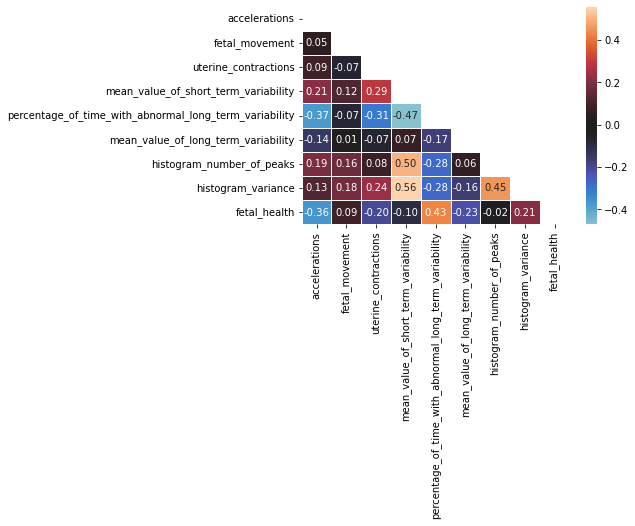

In [43]:
# create correlation matrix
corr = data_red.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

No features show extrem values of pairwise correlations so no features are excluded based on this measure.

### RFE Based Feature Selection

Next I will try to use an automatic recursive feature elimination so see if I can further reduce the complexity of the model.

In [44]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5, verbose=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print(f"{acc:.1%} accuracy on test set.") 

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
{'accelerations': 2, 'fetal_movement': 4, 'uterine_contractions': 1, 'mean_value_of_short_term_variability': 1, 'percentage_of_time_with_abnormal_long_term_variability': 1, 'mean_value_of_long_term_variability': 1, 'histogram_number_of_peaks': 3, 'histogram_variance': 1}
Index(['uterine_contractions', 'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_variance'],
      dtype='object')
87.6% accuracy on test set.


In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)
acc = accuracy_score(y_test, lr.predict(X_test))
lr_mask_low = lr.coef_ < -0.3
lr_mask_high = lr.coef_ > 0.3
lr_mask_high


array([[ True, False,  True,  True, False,  True, False, False],
       [False, False, False, False, False,  True,  True, False],
       [False, False, False,  True,  True, False, False,  True]])

RFE marked `fetal_movement` and `histogram_number_of_peaks` as of low impact on the model, these also showed very low correlation to fetal health, so I will remove those.

In [35]:
data_red.drop(columns=["fetal_movement", "histogram_number_of_peaks"], inplace=True)

### K Means Clustering

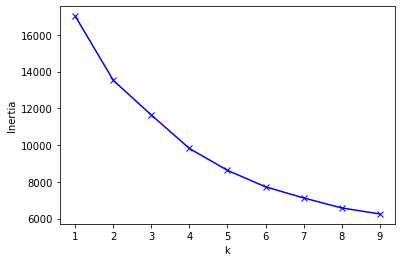

In [9]:
from sklearn.cluster import KMeans

inertia = []
K = range(1,10)

for k in K:
    kc = KMeans(n_clusters=k)
    kc.fit(X)
    inertia.append(kc.inertia_)
    
# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=2).fit(X)

labels = pd.Series(kmeans.labels_)
data['cluster_labels'] = labels
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_min,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance,fetal_health,cluster_labels
0,120.0,0.000,0.0,0.000,0.0,0.0,73.0,0.5,43.0,2.4,62.0,126.0,2.0,120.0,73.0,2.0,0
1,132.0,0.006,0.0,0.006,0.0,0.0,17.0,2.1,0.0,10.4,68.0,198.0,6.0,141.0,12.0,1.0,1
2,133.0,0.003,0.0,0.008,0.0,0.0,16.0,2.1,0.0,13.4,68.0,198.0,5.0,141.0,13.0,1.0,1
3,134.0,0.003,0.0,0.008,0.0,0.0,16.0,2.4,0.0,23.0,53.0,170.0,11.0,137.0,13.0,1.0,1
4,132.0,0.007,0.0,0.008,0.0,0.0,16.0,2.4,0.0,19.9,53.0,170.0,9.0,137.0,11.0,1.0,1


<AxesSubplot:xlabel='Constant', ylabel='baseline value'>

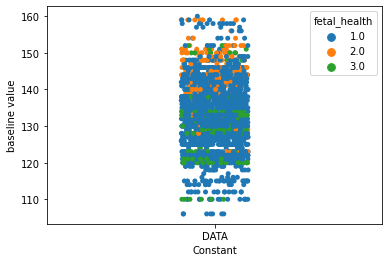

In [11]:
data['Constant'] = 'DATA'

sns.stripplot(x=data['Constant'], y=data['baseline value'], hue=data['fetal_health'], jitter=True)


In [12]:
data.cluster_labels.value_counts()

0    1234
1     892
Name: cluster_labels, dtype: int64